# End-to-End Data Science Notebook

This notebook covers the entire workflow:
1. Defining a question  
2. Data loading  
3. Data preprocessing  
4. Exploratory Data Analysis (EDA)  
5. Machine Learning modeling  


## 1. Define the Data Science Question  
**Question:** *Can we predict salary based on available features in the dataset?*

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/salary.csv')#, encoding='utf-8'
#df = pd.read_csv('/mnt/data/salary.csv')
df.head()

,Unnamed: 0,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [139]:
df = df.rename(columns={
    'Unnamed: 0': 'USERID',
    'Timestamp': 'Timestamp',
    'How old are you?': 'Age',
    'What industry do you work in?': 'Industry',
    'Job title': 'Job title',
    'If your job title needs additional context, please clarify here:': 'Job title context',
    'What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'Salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'Compensation',
    'Please indicate the currency': 'Currency',
    'If "Other," please indicate the currency here: ': 'Other currency',
    'If your income needs additional context, please provide it here:': 'Salary context',
    'What country do you work in?': 'Country',
    'If you\'re in the U.S., what state do you work in?': 'State',
    'What city do you work in?': 'City',
    'How many years of professional work experience do you have overall?': 'Overall years of experience',
    'How many years of professional work experience do you have in your field?': 'Years of experience in current job',
    'What is your highest level of education completed?': 'Education level',
    'What is your gender?': 'Gender',
    'What is your race? (Choose all that apply.)': 'Race'
})

In [140]:
df

,USERID,Timestamp,Age,Industry,Job title,Job title context,Salary,Compensation,Currency,Other currency,Salary context,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
0,0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28175,28175,2025-10-07 15:47:39.008,25-34,Law,Lawyer,NaN,200000,NaN,USD,NaN,NaN,USA,New Jersey,NYC,5-7 years,5-7 years,Master's degree,Man,Asian or Asian American
28176,28176,2025-10-07 17:36:45.062,18-24,NaN,student,at msu,0,0.0,USD,NaN,NaN,USA,Michigan,lansing,1 year or less,2 - 4 years,NaN,NaN,White
28177,28177,2025-10-08 09:51:01.836,under 18,NaN,1,NaN,1,1.0,EUR,11,111,1,NaN,1,11 - 20 years,21 - 30 years,Some college,Man,Black or African American
28178,28178,2025-10-08 17:01:11.999,18-24,Property or Construction,Field Assitant,Assistant Glazer,41600,NaN,USD,NaN,NaN,U.S.,Arizona,Tucson,1 year or less,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin, Native Am..."


## 2. Data Preprocessing

In [141]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28180 entries, 0 to 28179
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              28180 non-null  int64  
 1   Timestamp                           28180 non-null  object 
 2   Age                                 28180 non-null  object 
 3   Industry                            28099 non-null  object 
 4   Job title                           28178 non-null  object 
 5   Job title context                   7284 non-null   object 
 6   Salary                              28180 non-null  int64  
 7   Compensation                        20824 non-null  float64
 8   Currency                            28180 non-null  object 
 9   Other currency                      217 non-null    object 
 10  Salary context                      3050 non-null   object 
 11  Country                             28180

,USERID,Salary,Compensation
count,28180.000000,2.818000e+04,2.082400e+04
mean,14089.500000,3.632109e+05,1.823083e+04
std,8135.009629,3.614845e+07,8.330045e+05
min,0.000000,0.000000e+00,0.000000e+00
25%,7044.750000,5.400000e+04,0.000000e+00
50%,14089.500000,7.500000e+04,2.000000e+03
75%,21134.250000,1.094125e+05,1.000000e+04
max,28179.000000,6.000070e+09,1.200000e+08


## STEP 2: Clean & Prepare the Dataset


# 2.1. Drop irrelevant columns

Some columns are free text or rarely helpful for analysis:

**Job title context**  7,284/28,180(non-null)	74% missing(Mostly blank); free text → low analytical value

**Salary context** 3,050/28,180(non-null)	89% missing	Free text and mostly empty

**Other currency** 217/28,180(non-null)	99% missing(Almost never used)

**USERID** (Only a unique identifier → 0 predictive value → drop)

**Timestamp** (Date user submitted survey → irrelevant to salary → drop)

**City** (VERY high cardinality but may be kept depending on use-case)

In [142]:
 #Drops specific columns
df = df.drop(['Timestamp', 'Job title context', 'Salary context',
              'Other currency'], axis=1)

In [143]:
# Drops rows containing ANY missing value
#df = df.dropna()
df.head()

,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# 2.2. Check missing values

decide for each column whether we should:

drop rows

fill with mode / median

treat as category "Unknown"

In [144]:
df.isna().sum()

,0
USERID,0
Age,0
Industry,81
Job title,2
Salary,0
Compensation,7356
Currency,0
Country,0
State,5056
City,82


**DO Nothing for Column having 0% missing values**

**Age**                                 0              (0% missing)   **OK**

**Salary**                              0              (0% missing) **OK**

**Currency**                            0              (0% missing) **OK**

**Country**                             0             (0% missing) **OK**

**Overall years of experience**         0             ( 0% missing) **OK**

**Years of experience in current job**  0             ( 0% missing) **OK**

**Very Small Missing Values (<1%) — Fill with MODE Why?**

1.   Categorical columns
2.   Very low missing
3.   Dropping rows is unnecessary
4.   Mode preserves distribution

**Industry**                            81             (0.29%  missing)

**Job title**                           2              (0.007% missing)

**City**                                82            ( 0.29% missing)

**Education level**                     236           (0.84% missing)

**Gender**                              182           ( 0.65% missing)

**Race**                                190           (0.67% missing)


In [145]:
fill_mode_cols = ['Industry', 'Job title', 'City', 'Education level', 'Gender', 'Race']

for col in fill_mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**Large Missing Values (15–30%) — Fill with MEDIAN (numeric) or 'Unknown' (categorical)**

**Compensation**                        7,356          (26.1% missing)
**State**                               5,056         (17.9% missing)

**Compensation — (Numeric)**

7,356 (26% missing )

Cannot drop rows (too much data loss)
Median is safer than mean (because of outliers)

In [146]:
df['Compensation'] = df['Compensation'].fillna(df['Compensation'].median())


**State — (Categorical)**

5,056 (17.9% missing)

1. Missing NOT random or error → only US workers have a state For other it is not applicable
2. Filling with mode (e.g., “California”) would be incorrect
3. Better to assign a new category “Unknown”

In [147]:
df['State'] = df['State'].fillna('Unknown')


In [148]:
df.isna().sum()

,0
USERID,0
Age,0
Industry,0
Job title,0
Salary,0
Compensation,0
Currency,0
Country,0
State,0
City,0


# 2.3. Clean Age column

Age is currently text (e.g., “25-34”, “35-44”).

Machine learning models work much better when Age is numeric, because:

1. Numeric values allow models to capture salary trends across age

2. It allows correlation analysis

3. It improves feature scaling, regression, and tree models

4. Models can learn a smooth relationship

If your goal is:

✔ Predict salary →

Either use:

midpoint (if numeric helpful)

or ordinal encoding

or one-hot encoding

✔ Only analyze patterns →

Leave age as-is (categorical).
So we should convert these age ranges → numbers.

✔ EDA helps you decide the BEST encoding

After you explore:

If the ranges behave linearly → midpoint makes sense

If the ranges behave non-linearly → ordinal or one-hot is better

If a range dominates salary groups → maybe combine some categories

In [149]:
#need to code here
midpoint_map = {
    'under 18': 17.0,
    '18-24': 21.0,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or over': 69.5
}
df['Age'] = df['Age'].map(midpoint_map)
df.head()

,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
0,0,29.5,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,29.5,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,Unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,29.5,"Accounting, Banking & Finance",Marketing Specialist,34000,2000.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,29.5,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,29.5,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


/tmp/ipython-input-1505786327.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Salary', data=df,


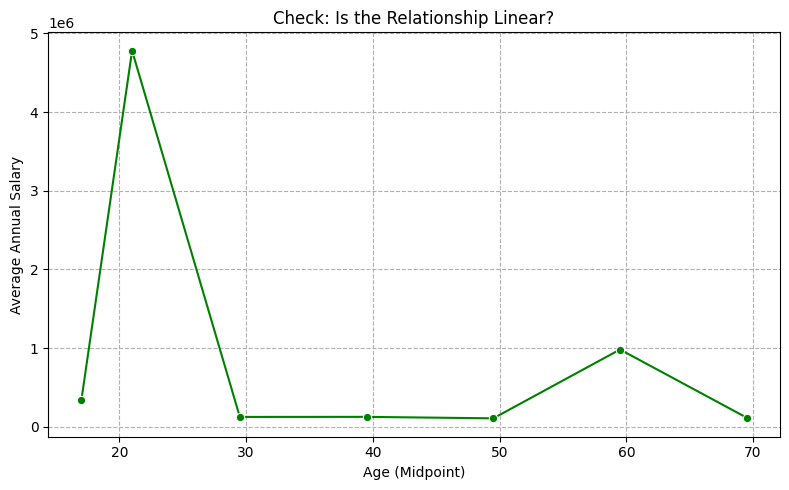

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# FIX 1: Use 'Age' (Numeric) to ensure proper sorting and spacing
# FIX 2: Use ' Salary' (The correct column name)
sns.lineplot(x='Age', y='Salary', data=df,
             marker='o', color='green', ci=None)

plt.title('Check: Is the Relationship Linear?')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Average Annual Salary')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()

# 2.4. Clean Experience Columns

Both work experience columns are categorical ranges:

"1 year or less"

"2 – 4 years"

"5 – 7 years"

"8 – 10 years"

etc.

We will convert these into numeric midpoints.

In [151]:
#need code here
#for column = Overall years of experience
experience_map = {
    '1 year or less': 0.5,        # 0 to 1 range
    '2 - 4 years': 3.0,           # (2 + 4) / 2
    '5-7 years': 6.0,             # (5 + 7) / 2
    '8 - 10 years': 9.0,          # (8 + 10) / 2
    '11 - 20 years': 15.5,        # (11 + 20) / 2
    '21 - 30 years': 25.5,        # (21 + 30) / 2
    '31 - 40 years': 35.5,        # (31 + 40) / 2
    '41 years or more': 45.5      # Assumed range 41-50
}

df['Overall years of experience'] = df['Overall years of experience'].map(experience_map)
df.head()

,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
0,0,29.5,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,6.0,5-7 years,Master's degree,Woman,White
1,1,29.5,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,Unknown,Cambridge,9.0,5-7 years,College degree,Non-binary,White
2,2,29.5,"Accounting, Banking & Finance",Marketing Specialist,34000,2000.0,USD,US,Tennessee,Chattanooga,3.0,2 - 4 years,College degree,Woman,White
3,3,29.5,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,9.0,5-7 years,College degree,Woman,White
4,4,29.5,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,9.0,5-7 years,College degree,Woman,White


In [152]:
#need code here
#for column  = Years of experience in current job
experience_map = {
    '1 year or less': 0.5,        # 0 to 1 range
    '2 - 4 years': 3.0,           # (2 + 4) / 2
    '5-7 years': 6.0,             # (5 + 7) / 2
    '8 - 10 years': 9.0,          # (8 + 10) / 2
    '11 - 20 years': 15.5,        # (11 + 20) / 2
    '21 - 30 years': 25.5,        # (21 + 30) / 2
    '31 - 40 years': 35.5,        # (31 + 40) / 2
    '41 years or more': 45.5      # Assumed range 41-50
}

df['Years of experience in current job'] = df['Years of experience in current job'].map(experience_map)
df.head()

,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
0,0,29.5,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,6.0,6.0,Master's degree,Woman,White
1,1,29.5,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,Unknown,Cambridge,9.0,6.0,College degree,Non-binary,White
2,2,29.5,"Accounting, Banking & Finance",Marketing Specialist,34000,2000.0,USD,US,Tennessee,Chattanooga,3.0,3.0,College degree,Woman,White
3,3,29.5,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,9.0,6.0,College degree,Woman,White
4,4,29.5,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,9.0,6.0,College degree,Woman,White


# 2.5. Clean Salary & Additional Compensation

Already numeric — we’ll just:

cap extreme outliers using IQR

ensure negativity or zeros are handled

In [153]:
df[['Salary', 'Compensation']].describe()

,Salary,Compensation
count,2.818000e+04,2.818000e+04
mean,3.632109e+05,1.399399e+04
std,3.614845e+07,7.161067e+05
min,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00
50%,7.500000e+04,2.000000e+03
75%,1.094125e+05,5.000000e+03
max,6.000070e+09,1.200000e+08


These columns are already numeric, so we don’t need to convert them.
But we do need to make sure they are clean and realistic before using them in EDA or Machine Learning

Salary max = 6,000,070,000 → unrealistic

Compensation max = 120,000,000 → unrealistic

These are almost certainly:

1. typing errors (extra zeros)

2. currency conversion mistakes

3. troll/incorrect entries

These extreme values will break:

1. EDA visualizations

2. Machine Learning models

3. Summary statistics

#  1.Remove or fix negative values

Salary cannot be:

negative

negative bonuses

negative compensation

If found:

👉 They are errors → set to NaN or replace with 0.

In [154]:
# Check negative values
df[(df['Salary'] < 0) | (df['Compensation'] < 0)]


,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race


In [155]:
df['Salary'] = df['Salary'].clip(lower=0)
df['Compensation'] = df['Compensation'].clip(lower=0)


**Handle zeros appropriately**

Many surveys have:

Salary = 0
Compensation = 0

Are zeros acceptable?

**Salary** = 0 → Not realistic
Most likely:

1. respondent skipped
2. error
3. student / unemployed but answered incorrectly

Best treatment:

convert to NaN or remove row

**Compensation** = 0 → Acceptable
Many jobs have

1. no bonuses
2. no commissions
3. no overtime

So keep zeros in Compensation.

In [156]:
import numpy as np
df['Salary'] = df['Salary'].replace(0, np.nan)

**How to fix? → Use IQR capping**

IQR = Interquartile Range
Used to detect values far outside the normal range.

Steps:

Compute 25th percentile (Q1)

Compute 75th percentile (Q3)

Compute IQR = Q3 – Q1

Define upper limit = Q3 + 1.5 × IQR

Replace any value above upper limit (cap it)

Why not simply delete?

Because:

some people may genuinely have high salaries

deleting rows reduces data

capping keeps data but reduces distortion

In [157]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit


(np.float64(193250.0), np.float64(-29550.0))

In [158]:
df[df['Salary'] > upper_limit].head()

,USERID,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race
32,32,29.5,"Accounting, Banking & Finance",Financial Advisor,230000.0,2000.0,USD,USA,Missouri,St. Louis,15.5,15.5,College degree,Woman,White
47,47,39.5,Computing or Tech,Product Design Director,200850.0,40000.0,USD,USA,North Carolina,Chapel Hill,15.5,15.5,College degree,Woman,White
104,104,39.5,Property or Construction,Senior Project Manager,196000.0,10000.0,USD,United States,New York,New York,15.5,15.5,College degree,Man,White
175,175,39.5,"Marketing, Advertising & PR",Brand Consultant,400000.0,0.0,USD,United States,New York,Chatham,15.5,15.5,College degree,Woman,White
187,187,39.5,"Marketing, Advertising & PR",Associate Creative Director,215000.0,10000.0,USD,United States,New York,New York City,15.5,15.5,College degree,Woman,Another option not listed here or prefer not t...


In [159]:
df['Salary'] = np.where(df['Salary'] > upper_limit,
                        upper_limit,
                        df['Salary'])

#np.where(Condition, Value if True, Value if False)

In [160]:
Q1_c = df['Compensation'].quantile(0.25)
Q3_c = df['Compensation'].quantile(0.75)
IQR_c = Q3_c - Q1_c

upper_c = Q3_c + 1.5 * IQR_c

df['Compensation'] = np.where(df['Compensation'] > upper_c,
                              upper_c,
                              df['Compensation'])


In [161]:
df[['Salary', 'Compensation']].describe()


,Salary,Compensation
count,28151.000000,28180.000000
mean,85789.079642,3772.155394
std,43381.931527,4443.557451
min,1.000000,0.000000
25%,54000.000000,0.000000
50%,75000.000000,2000.000000
75%,109700.000000,5000.000000
max,193250.000000,12500.000000


# 2.6. Standardize Currencies

If Currency contains multiple currencies (USD, EUR, GBP, etc.)
→ we can convert everything to USD using a conversion dictionary.

In [162]:
df['Currency'].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [163]:
df[df['Currency'] == 'Other'].shape[0]


168

If kept, you would have:

salaries in unknown currencies

incorrect averages

bad salary distribution plots

failed model training

broken currency conversion

Not worth the trouble.

In [164]:
df = df[df['Currency'] != 'Other'].reset_index(drop=True)

In [ ]:
conversion_rates = {
    'USD': 1,
    'EUR': 1.07,
    'GBP': 1.25,
    'CAD': 0.74,
    'CHF': 1.12,
    'ZAR': 0.053,
    'SEK': 0.095,
    'HKD': 0.13,
    'JPY': 0.0067,

    # AUD/NZD → use average of AUD (0.66) and NZD (0.60)
    'AUD/NZD': (0.66 + 0.60) / 2,

    # "Other" cannot be converted → will become NaN
    'Other': None
}


In [165]:
df['Salary_USD'] = df['Salary'] * df['Currency'].map(conversion_rates)
df['Compensation_USD'] = df['Compensation'] * df['Currency'].map(conversion_rates)


In [166]:
df = df.drop(['Currency'], axis=1)

In [167]:
df.to_csv("/content/drive/MyDrive/Dataset/cleaned_salary_data.csv", index=False)


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              28012 non-null  int64  
 1   Age                                 28012 non-null  float64
 2   Industry                            28012 non-null  object 
 3   Job title                           28012 non-null  object 
 4   Salary                              27983 non-null  float64
 5   Compensation                        28012 non-null  float64
 6   Country                             28012 non-null  object 
 7   State                               28012 non-null  object 
 8   City                                28012 non-null  object 
 9   Overall years of experience         28012 non-null  float64
 10  Years of experience in current job  28012 non-null  float64
 11  Education level                     28012

# 2.7. Reduce high cardinality categories

Job title has 14,000+ unique entries → we need normalization.

We can:

lowercase

remove punctuation

extract seniority (“senior”, “junior”, “lead”)

extract role categories (“data scientist”, “software engineer”, etc.)

# 2.8. Encode categorical features

Country

Industry

Education

Gender

Race

We can use:

One-hot encoding for small-cardinality categories

Frequency encoding for large-cardinality categories

## 3. Exploratory Data Analysis (EDA)

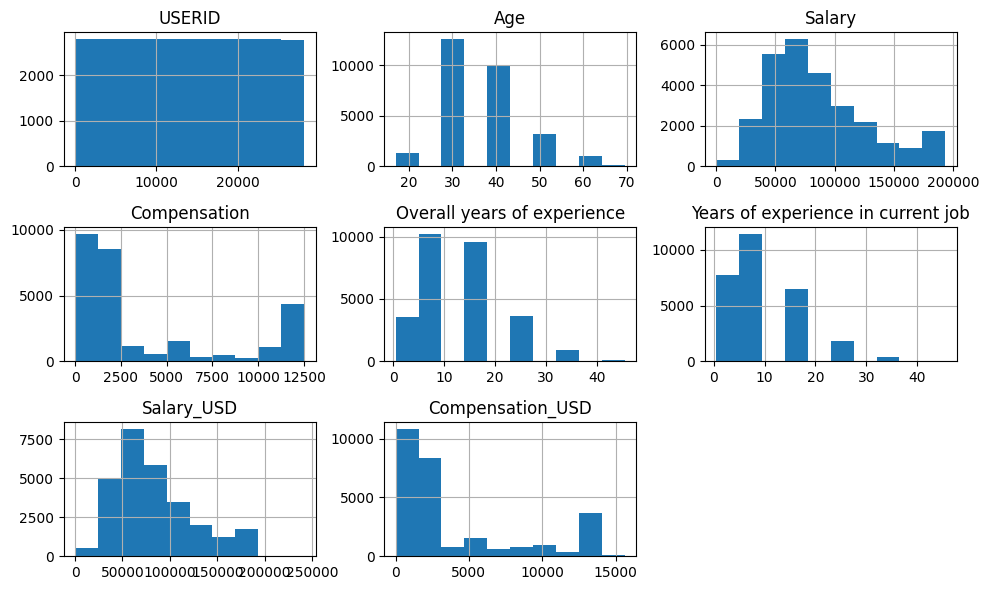

In [170]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

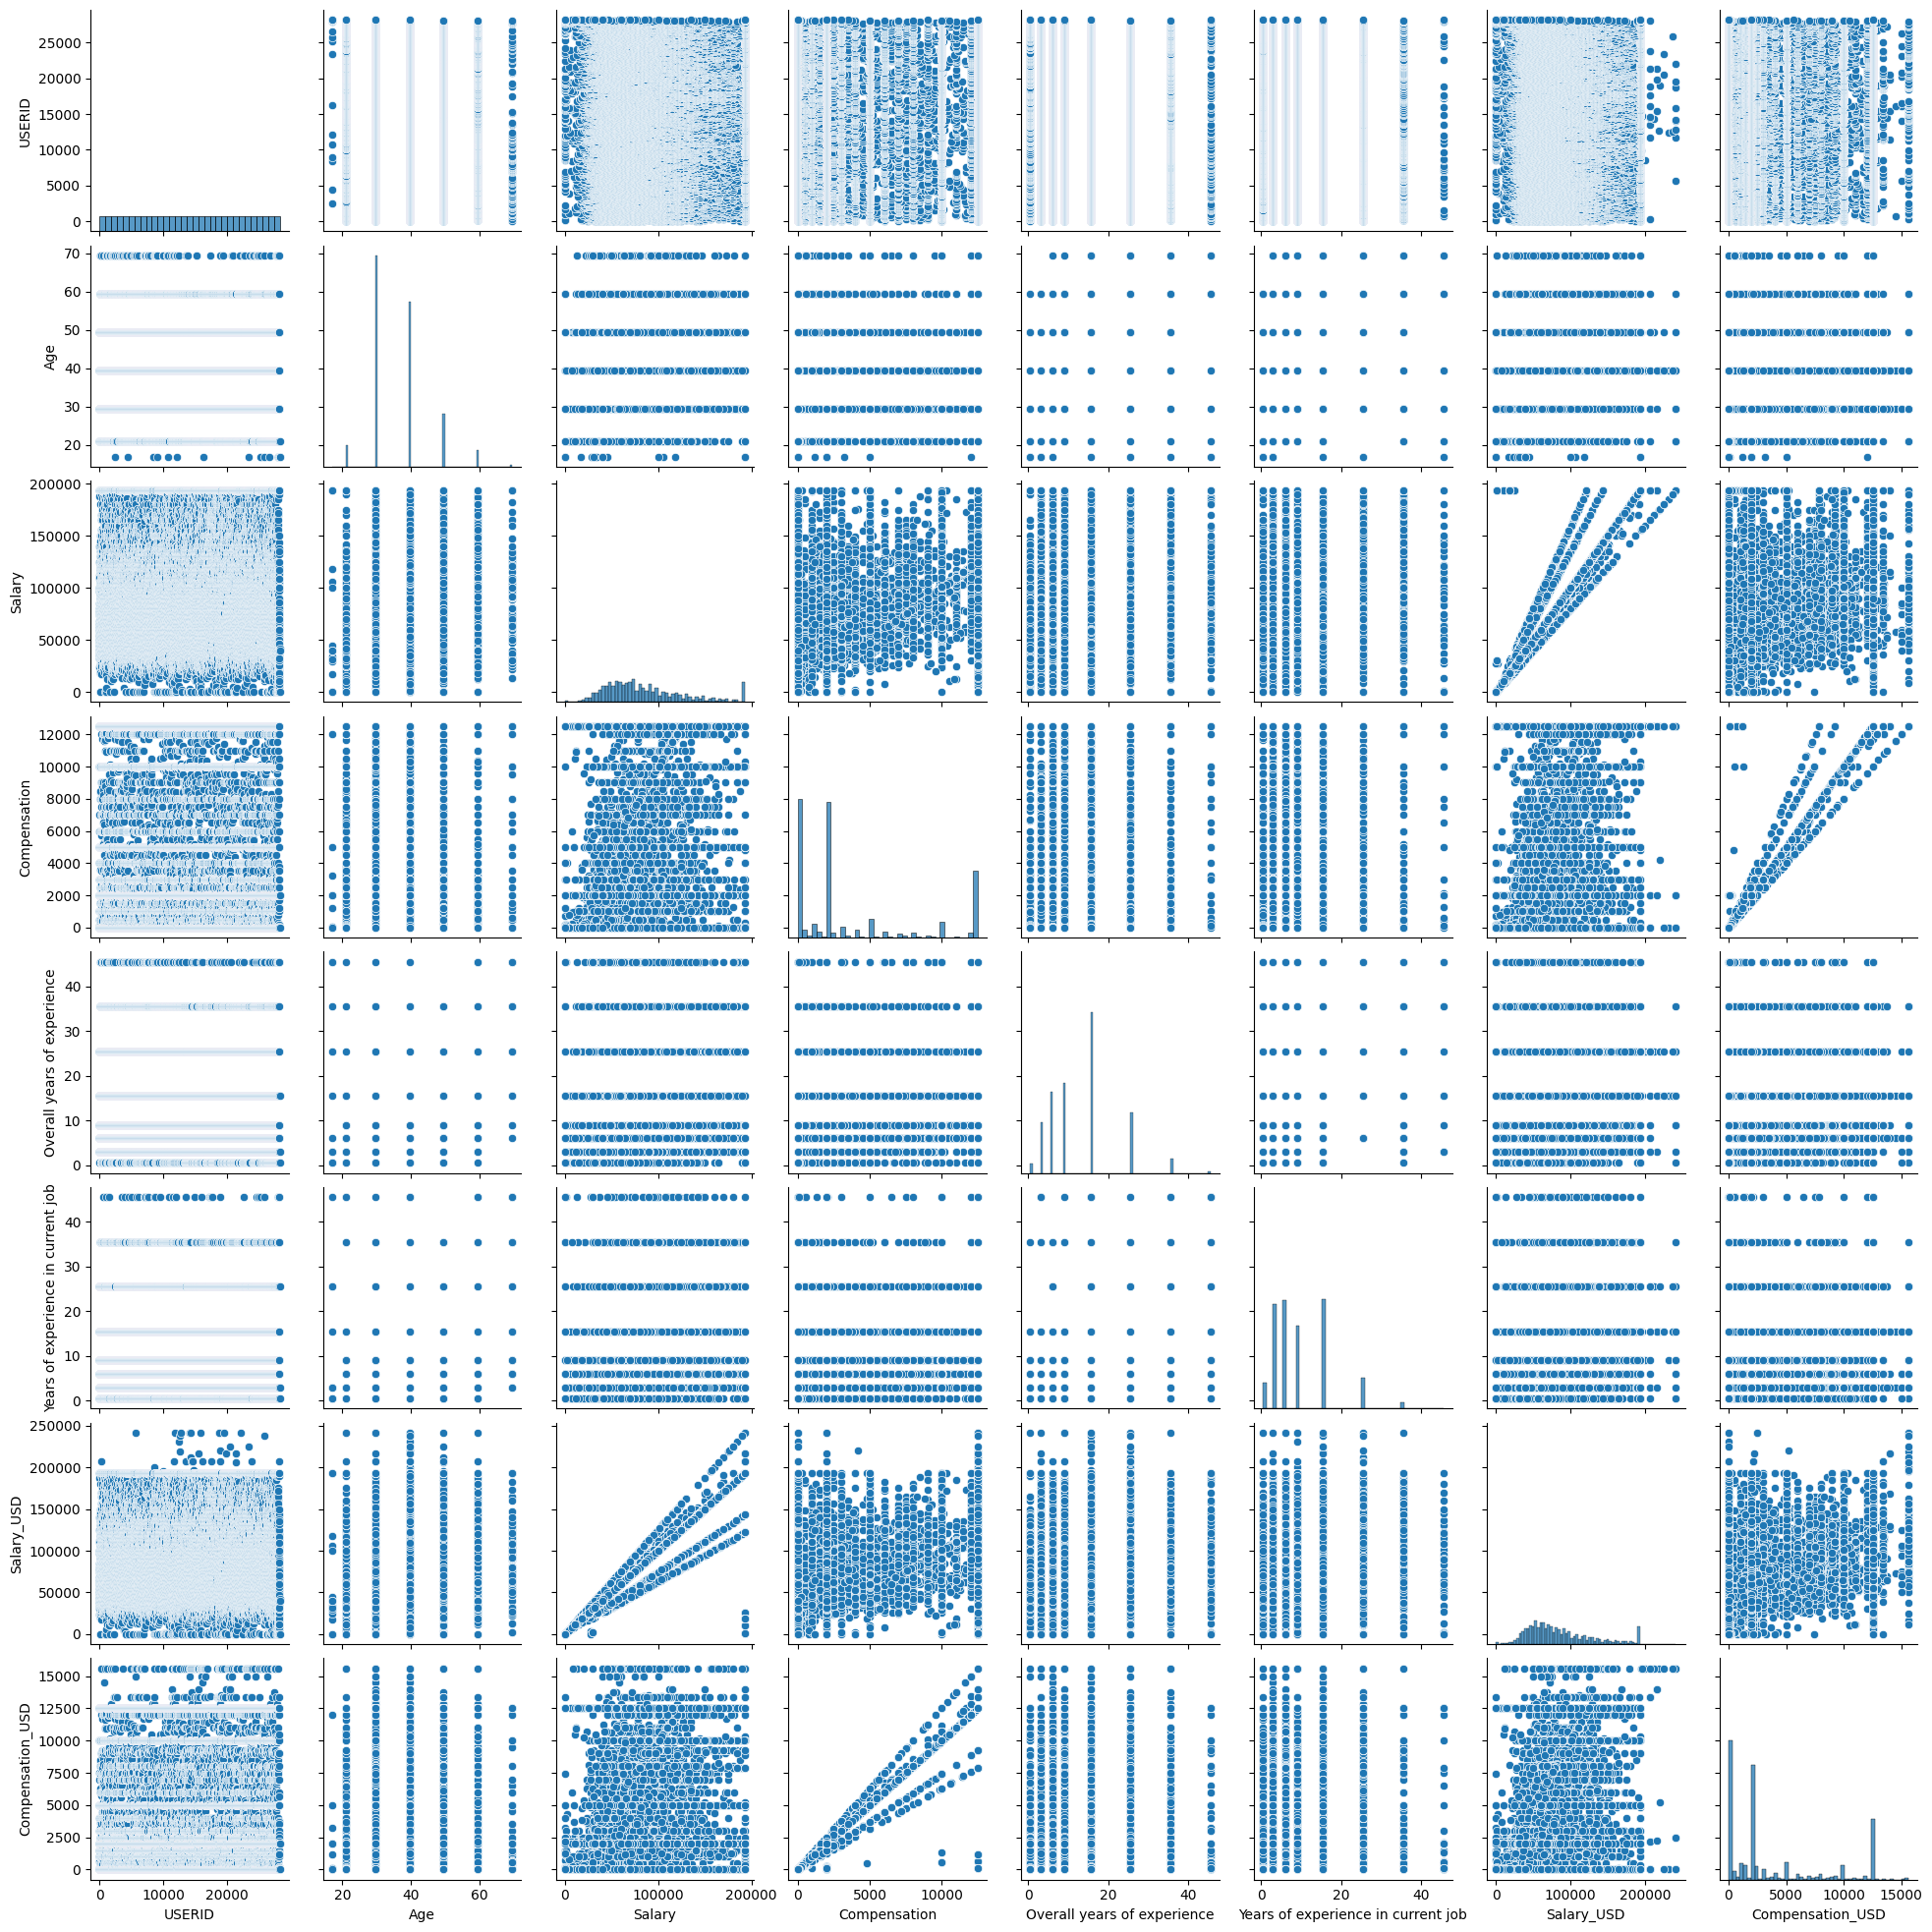

In [171]:
import seaborn as sns

sns.pairplot(df)
plt.show()

## 4. Machine Learning Model

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume target column is 'salary'
feature_cols = ['Age', 'Years of experience in current job']
target_cols = 'Salary'

# Remove rows with missing values (Crucial step!)
# We create a temporary clean table for the model
model_data = df.dropna(subset=feature_cols + [target_cols])

X = model_data[feature_cols]
y = model_data[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print(f"MSE: {mse}")
print(f"RMSE (Average Error): ${np.sqrt(mse):,.0f}")

MSE: 1683093178.8781056
RMSE (Average Error): $41,026
